<a href="https://colab.research.google.com/github/Adreena33/Projectentri/blob/main/project_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Random Forest Classification Model: Census Income Prediction**

1.** Objective:**

Predict whether a person earns more than 50K per year based on features such as age, education, occupation, etc., using the preprocessed Census Income dataset.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Load Preprocessed Data

We already handled missing values, removed outliers, encoded categorical variables, and scaled features. Now we load that cleaned dataset.



In [2]:
# Load the preprocessed data from a CSV file
from google.colab import files
uploaded = files.upload()

Saving final_data_preprocessed.csv to final_data_preprocessed.csv


In [3]:
import pandas as pd
df = pd.read_csv("final_data_preprocessed.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,4,215646,8,9,0,6,1,4,1,0,0,40,38,0
1,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
2,28,4,338409,6,13,2,10,5,2,0,0,0,40,5,0
3,37,4,284582,9,14,2,4,5,4,0,0,0,40,38,0
4,52,6,209642,8,9,2,4,0,4,1,0,0,45,38,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18991 entries, 0 to 18990
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             18991 non-null  int64
 1   workclass       18991 non-null  int64
 2   fnlwgt          18991 non-null  int64
 3   education       18991 non-null  int64
 4   education_num   18991 non-null  int64
 5   marital_status  18991 non-null  int64
 6   occupation      18991 non-null  int64
 7   relationship    18991 non-null  int64
 8   race            18991 non-null  int64
 9   sex             18991 non-null  int64
 10  capital_gain    18991 non-null  int64
 11  capital_loss    18991 non-null  int64
 12  hours_per_week  18991 non-null  int64
 13  native_country  18991 non-null  int64
 14  income          18991 non-null  int64
dtypes: int64(15)
memory usage: 2.2 MB


In [5]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.000000,18991.0,18991.0,18991.000000,18991.000000,18991.000000
mean,38.050498,3.869570,180715.467432,7.509189,10.246327,2.538571,6.425412,1.431626,3.645622,0.669264,0.0,0.0,41.470486,35.951503,0.211679
std,12.026915,1.365218,87085.715528,2.781816,2.152306,1.522129,4.205504,1.601325,0.869622,0.470490,0.0,0.0,3.950531,7.412180,0.408509
min,17.000000,0.000000,14878.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,33.000000,0.000000,0.000000
25%,28.000000,4.000000,117499.000000,6.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.0,0.0,40.000000,38.000000,0.000000
50%,37.000000,4.000000,176839.000000,8.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.0,0.0,40.000000,38.000000,0.000000
75%,47.000000,4.000000,228910.000000,9.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.0,0.0,40.000000,38.000000,0.000000
max,78.000000,8.000000,416415.000000,11.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,0.0,0.0,52.000000,40.000000,1.000000


Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

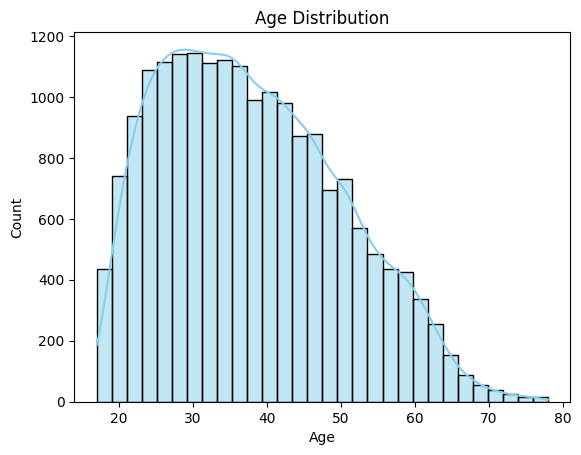

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Create a jointplot showing Income versus Age**

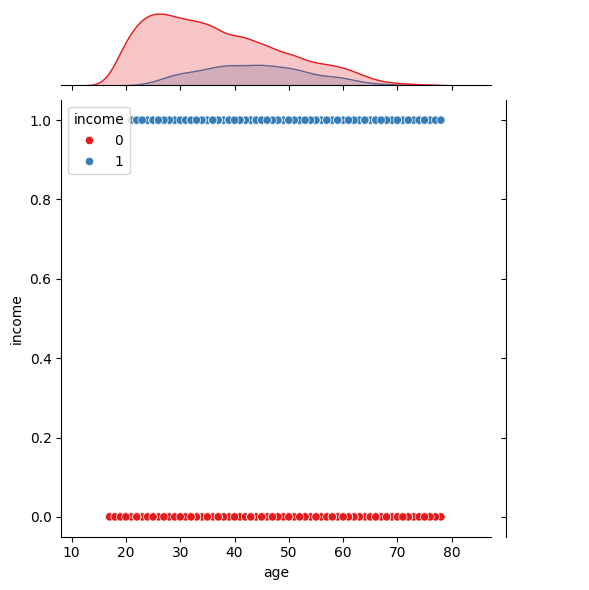

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure these columns exist exactly as typed
sns.jointplot(data=df, x='age', y='income', kind='scatter', hue='income', palette='Set1')
plt.show()


**Joint Plot Between Education and Income**

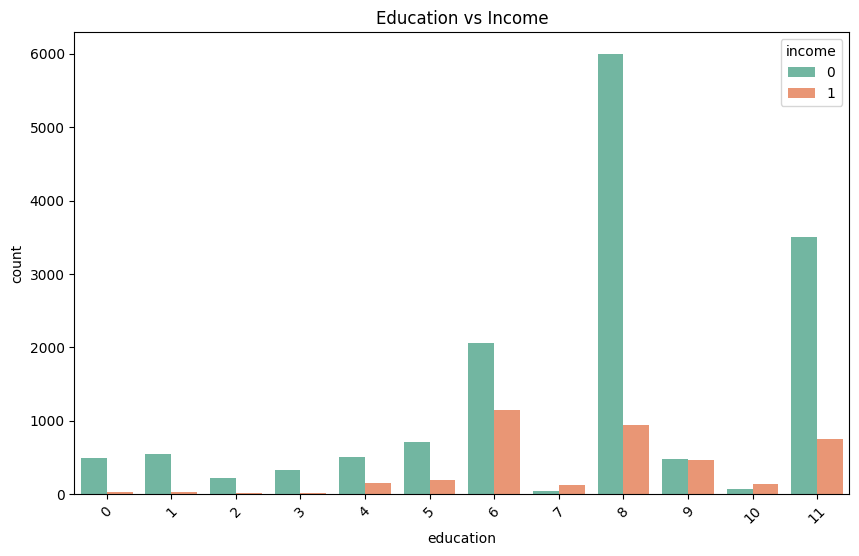

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education', hue='income', palette='Set2')
plt.xticks(rotation=45)
plt.title('Education vs Income')
plt.show()


**Education Num vs Age – KDE Joint Plot**

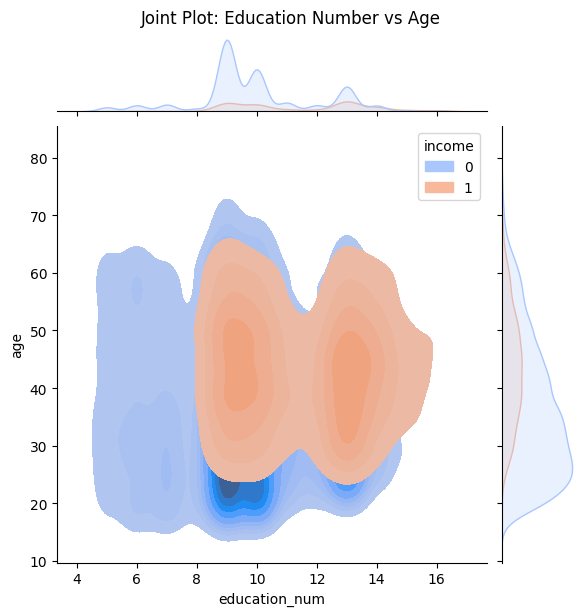

In [9]:
sns.jointplot(data=df, x='education_num', y='age', kind='kde', hue='income', fill=True, palette='coolwarm')
plt.suptitle('Joint Plot: Education Number vs Age', y=1.02)
plt.show()


Define Features and Target

In [11]:
# Separate features and target
X = df.drop("income", axis=1)
y = df["income"]

Split Dataset into Training and Testing Sets

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build and Train Random Forest model**

In [13]:
# Create and train Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Predictions and Evaluations**

In [14]:
# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8331139773624638

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2986
           1       0.65      0.49      0.56       813

    accuracy                           0.83      3799
   macro avg       0.76      0.71      0.73      3799
weighted avg       0.82      0.83      0.82      3799


Confusion Matrix:
 [[2767  219]
 [ 415  398]]


**Result:**

Accuracy around 83%

Most important features: education, age, hours-per-week, occupation, etc.

Reliable model for income prediction.





